# 期中练习

## 要求

检验对上半学期知识的掌握，课后自行完成，可查阅各种资料。

### 如何提交

- 复制本文件，文件名改为`教学班号-编号.ipynb`。例如刘国强同学是2班第15号，文件名应改为`2-15.ipynb`。
- 在复制文件中答题，每道题的答案紧接题目。
- 答题结束后commit该文件，并提交pull request。



In [1]:
#2021113475 黄单麟 期中练习作业

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 练习1

为了分析自变量$x$和因变量$y$的关系，通过测量得到带误差的20个样本数据如下所示

In [3]:
X = np.array([ 0.70846042, -0.68388789,  1.03780474,  1.08334621,  0.77026309,
        0.19722004, -0.46819526, -0.45270204,  0.02362673,  0.06549472,
        0.08898416,  0.59424455, -0.26400365,  0.2456922 ,  0.5114847 ,
       -0.31604016, -1.49329364,  1.24112288,  1.01993764,  1.75634392])

In [4]:
Y = np.array([ 4.49682518,  3.5737603 ,  7.93568197,  3.58719009,  5.38341441,
        5.47930021, -0.9861325 , -0.15686681,  2.36963799,  4.01600211,
       -0.20329642,  3.07728831, -1.30408343,  2.84796441,  2.27915787,
        2.62078689, -1.2855133 ,  4.39242028,  6.24385669,  6.00822241])

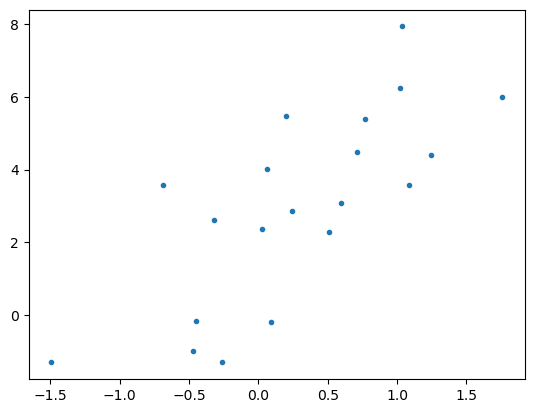

In [5]:
plt.plot(X, Y, ".")

### 1.1 划分训练集和测试集

将20个数据点划分为训练集和测试集，期中训练集为前15个数据点，测试集为后5个。

In [6]:
# 已有数据是乱序排列，直接按索引分类
X_train = X[0:15]
Y_train = Y[0:15]
X_test  = X[15:]
Y_test  = Y[15:]

In [7]:
def regression(X, Y, n):
    rows = [X**i for i in reversed(range(n))]
    A = np.vstack(rows).T
    theta = np.linalg.solve(A.T@A, A.T@Y)
    return theta

In [8]:
def predict(X, theta):
    n = len(theta)
    degrees = reversed(range(n))

    Y = np.zeros_like(X)
    for w, d in zip(theta, degrees):
        Y += w * X**d
    return Y

### 1.2 数据建模

分别用1到4次多项式函数作为模型拟合训练集中的数据，并分别计算每个模型与数据的均方差（MSE）。

哪一个模型与训练数据拟合最好？

Text(0, 0.5, 'Y')

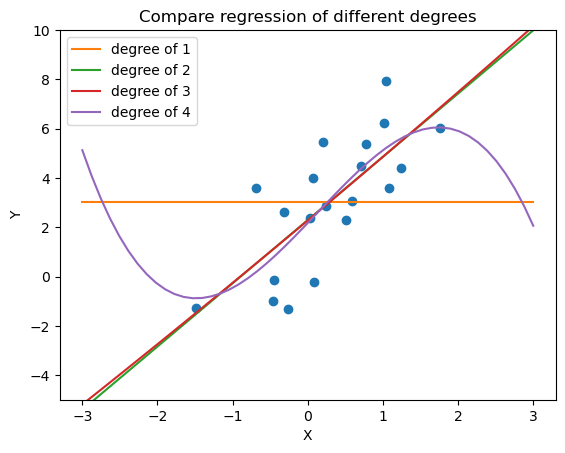

In [9]:
X_model = np.linspace(-3, 3, 50)

plt.plot(X, Y, "o")

for n in range(1, 5):
    theta = regression(X, Y, n)
    Yhat = predict(X, theta)
    Y_model = predict(X_model, theta)

    plt.plot(X_model, Y_model, label="degree of {}".format(n))
plt.ylim(-5, 10)
plt.title("Compare regression of different degrees")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")

1到4次多项式拟合训练集数据均方差如下:


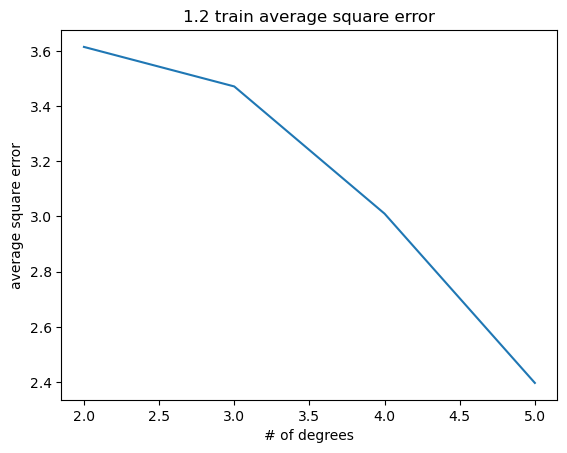

训练集拟合的均方差为[3.6141199809365916, 3.4709875708912987, 3.0102468155333737, 2.397166165471182]
在训练数据集的拟合中,第4次多项式函数模型效果最好


In [10]:
print("1到4次多项式拟合训练集数据均方差如下:")
Ss_test = []
Ns_test = []
Ss = []
Ns = []
for n in range(2, 6):#求出1-4次多项式拟合值与实际值的均方差
    theta = regression(X_train, Y_train, n)
    Yhat = predict(X_train, theta)
    E = Y_train - Yhat
    S = np.dot(E, E) / len(Y_train)
    Ss.append(S)
    Ns.append(n)
plt.plot(Ns, Ss, label="train")
plt.title("1.2 train average square error")
plt.xlabel("# of degrees")
plt.ylabel("average square error")
plt.show()
min_train= min(Ss)
min_train=Ss.index(min_train) # 求train最小值对应索引
print("训练集拟合的均方差为{}".format(Ss))
print("在训练数据集的拟合中,第{}次多项式函数模型效果最好".format(min_train+1))

### 1.3 模型测试
计算4个模型与测试数据的均方差，哪一个模型与测试数据拟合最好？

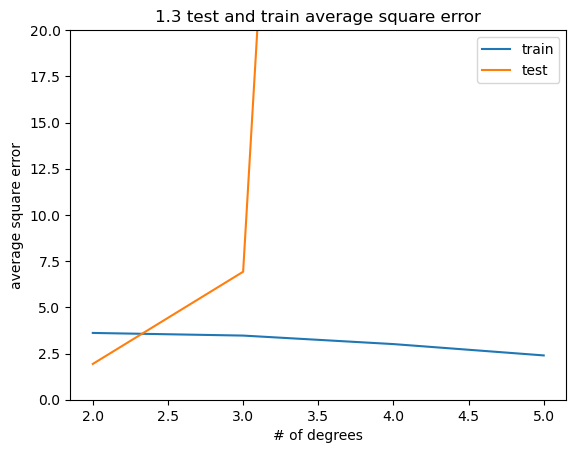

测试集拟合的均方差为[1.9373288022689086, 6.924885916261649, 145.5382917869212, 2717.4997768001886]
在测试数据集的拟合中,第1次多项式函数模型效果最好


In [11]:
for n in range(2, 6):#求出训练集所拟合的函数对测试集的拟合效果
    theta = regression(X_train, Y_train, n)
    Yhat_test = predict(X_test, theta)
    E = Y_test - Yhat_test
    S = np.dot(E, E) / len(Y_test)
    Ss_test.append(S)
    Ns_test.append(n)
plt.plot(Ns, Ss, label="train")
plt.plot(Ns_test, Ss_test, label="test")
plt.title("1.3 test and train average square error")
plt.xlabel("# of degrees")
plt.ylabel("average square error")
plt.legend()
plt.ylim(0, 20)
plt.show()
min_test= min(Ss_test)
min_test=Ss_test.index(min_test) # 求test最小值对应索引
print("测试集拟合的均方差为{}".format(Ss_test))
print("在测试数据集的拟合中,第{}次多项式函数模型效果最好".format(min_test+1))

In [12]:
print("从输出的结果可知，1次多项式函数的MSE最小,1次多项式函数与训练数据拟合最好")

从输出的结果可知，1次多项式函数的MSE最小,1次多项式函数与训练数据拟合最好


1.2和1.3的答案是否相同？两者的异同有什么意义？

In [13]:
print("不相同，这是因为模型在训练集上的表现可能不同于其在测试集上的表现")
print("意义：我们可以了解模型在训练集和测试集上的表现差异。如果问题1和问题2的答案相似，则表明模型在训练集和测试集上的表现一致具有较好的泛化能力。")
print("然而，如果问题1和问题2的答案差异较大，则表明模型可能出现过拟合现象，对于新数据的预测效果可能较差")
print("两次测试的异同才能帮助我们选择最适合的模型并评估其预测性能")

不相同，这是因为模型在训练集上的表现可能不同于其在测试集上的表现
意义：我们可以了解模型在训练集和测试集上的表现差异。如果问题1和问题2的答案相似，则表明模型在训练集和测试集上的表现一致具有较好的泛化能力。
然而，如果问题1和问题2的答案差异较大，则表明模型可能出现过拟合现象，对于新数据的预测效果可能较差
两次测试的异同才能帮助我们选择最适合的模型并评估其预测性能


## 练习2 人工神经网络

有如下神经网络：
- 输入$x$是2维向量，输出$y$是1维标量
- 包含两个全连接层
    - 第一层有5个神经元，激活函数为sigmoid
    - 第二层有1个神经元，激活函数为relu
- 损失函数为均方差MSE

### 2.1 写出公式

- 写出relu、sigmoid函数的公式
\begin{equation}
ReLU(x)=\left\{
	\begin{aligned}
	0 \quad x<0\\
	x \quad x\geq0\\
	\end{aligned}
	\right
	.
\end{equation}

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$
- 写出整个神经网络的公式
$$y=\text{ReLU}(W_2\sigma(W_1x+b_1)+b_2)$$
其中，$x$是输入向量，$W_1$和$b_1$是第一层的权重和偏置,$W_2$和$b_2$是第二层的权重和偏置，$y$是最终输出的标量，$\sigma$是是Sigmoid激活函数，$\text{ReLU}$是ReLU激活函数

### 2.2 正向传播

假设已知4个数据点的输入'X'，参考输出'Y'，参数'W_1'、'B_1'、'W_2'、'B_2'，。

- 正向传播计算输出预测值'Y_pred'
- 计算损失值'L'


In [14]:
X = np.array([[-0.05025071,  1.12345037],
       [-1.2771336 , -0.03387919],
       [-0.06085093,  0.83960333],
       [ 0.26666122, -0.15723225]])

注意，这里输入'x'表示为行向量，即'X'中每行表示一个数据点。

In [15]:
Y = np.array([[ 0.34942997],
       [ 0.09796396],
       [ 1.80617515],
       [-0.50698293]])

In [16]:
W1 = np.random.randn(2,5)
b1 = np.random.randn(5)
W2 = np.random.randn(5,1)
b2 = np.random.randn(1,1)

In [17]:
W1 = np.array([[-0.15772071,  2.4169384 ,  1.18656177,  0.74048303,  0.95473468],
       [ 1.75613621,  0.44768404,  0.25003215,  0.52863169, -0.75204543]])

In [18]:
b1 = np.array([-1.00393578, -0.19942106, -1.23939537,  1.62336519, -0.21580562])

In [19]:
W2 = np.array([[ 0.8173788 ],
       [-0.01165333],
       [ 1.10703394],
       [ 0.90372372],
       [ 0.86510315]])

In [20]:
b2 = np.array([[0.277288]])

### 2.3 方向传播

计算损失值'L'对参数'W_1'、'B_1'、'W_2'、'B_2'的偏导数。

In [21]:
import numpy as np

In [22]:
def relu(x):#定义rule函数
    return np.maximum(0, x)
def sigmoid(x):#定义sigmoid函数
    return 1/(1+np.exp(-x))

In [23]:
# 正向传播计算预测值Y_pred
z1 = X.dot(W1) + b1
a1 = sigmoid(z1)
z2 = a1.dot(W2) + b2
Y_pred = relu(z2)
L = np.sum((Y - Y_pred) ** 2)# 计算均方差损失值L

In [24]:
dL_dY_pred = -2 * (Y - Y_pred) / len(Y)
dY_pred_dz2 = np.where(z2 > 0, 1, 0)
dL_dz2 = dL_dY_pred * dY_pred_dz2
dL_da1 = dL_dz2.dot(W2.T)
da1_dz1 = sigmoid(z1) * (1 - sigmoid(z1))
dL_dz1 = dL_da1 * da1_dz1
dL_dW1 = X.T.dot(dL_dz1)# 计算W1的偏导数
dL_db1 = np.sum(dL_dz1, axis=0)# 计算b1的偏导数
dL_dW2 = a1.T.dot(dL_dz2)# 计算W2的偏导数
dL_db2 = np.sum(dL_dz2, axis=0)# 计算b2的偏导数
print("预测值Y_pred:{}".format(Y_pred))
print("损失值L:{}".format(L))
print("dL_dW1:{}".format(dL_dW1))
print("dL_db1:{}".format(dL_db1))
print("dL_dW2:{}".format(dL_dW2))
print("dL_db2:{}".format(dL_db2))

预测值Y_pred:[[2.18514844]
 [1.35081552]
 [2.09965131]
 [1.98338406]]
损失值L:11.22755532709232
dL_dW1:[[-0.10062818 -0.00045547  0.01227741 -0.12888547 -0.04684264]
 [ 0.16104007 -0.00277893  0.20342634  0.06970365  0.14329457]]
dL_db1:[ 0.45340951 -0.00683274  0.54292804  0.35971905  0.52730517]
dL_dW2:[[1.20554195]
 [1.33518175]
 [0.66155887]
 [2.42607152]
 [1.0643283 ]]
dL_db2:[2.93620659]
